## 3.2.

In [40]:
import numpy as np
import numpy.linalg
from matplotlib import pyplot as plt

def clgs(A):
    m, n = np.shape(A)
    V = np.copy(A)
    Q = np.eye(m, n)
    R = np.zeros((n, n))
    for j in range(n):
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]
    return Q, R

def mgs(A):
    m, n = np.shape(A)
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(n - 1):
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] = Q[:, i] / R[i, i]
        R[i, i + 1:] = np.matmul(Q[:, i], Q[:, i + 1:])
        Q[:, i + 1:] = Q[:, i + 1:] - np.matmul(Q[:, i:i + 1], R[i:i + 1, i + 1:])
    R[n - 1, n - 1] = np.linalg.norm(Q[:, n - 1])
    Q[:, n - 1] = Q[:, n - 1] / R[n - 1, n - 1]
    return Q, R

def qrhouse(A):
    m, n = np.shape(A)
    R = np.copy(A)
    V = np.zeros((m, n))
    for k in range(n):
        x = R[k:, k]
        v = x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1)[:, 0]
        V[k:, k] = v
        R[k:, k:] = R[k:, k:] - 2 * np.matmul(np.outer(v, v), R[k:, k:]) / np.dot(v, v)
    R = np.triu(R[:n, :])
    return V, R

def formQ(V):
    m, n = np.shape(V)
    Q = np.eye(m, n)
    for j in range(n - 1, -1, -1):
        v = V[:, j]
        Q = Q - 2 * np.matmul(np.outer(v, v), Q) / np.dot(v, v)
    return Q


### 3.2.(a)

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.


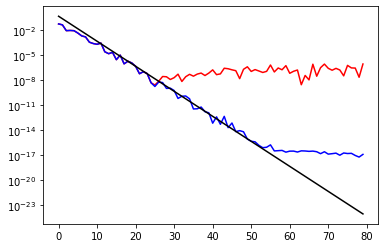

In [2]:
U = np.linalg.qr(np.random.normal(size = (80, 80)))[0]
V = np.linalg.qr(np.random.normal(size = (80, 80)))[0]
S = np.diag([pow(2, -j) for j in range(1, 81)])
A = U @ S @ V
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)
plt.semilogy(range(80), [Rc[i, i] for i in range(80)], 'r') # red
plt.semilogy(range(80), [Rm[i, i] for i in range(80)], 'b') # blue
plt.semilogy(range(80), [S[i, i] for i in range(80)], 'k') # black
plt.show()

modified Gram-Schmidt algorithm이 수치적으로 더 정확한 값을 출력함을 알 수 있다.

### 3.2.(b)

In [3]:
A = np.array([[0.70000, 0.70711], [0.70001, 0.70711]])
Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(V)
print("Householder :", np.linalg.norm(np.matmul(Q.T, Q) - np.eye(2, 2)))
print("Mgs :", np.linalg.norm(np.matmul(Qm.T, Qm) - np.eye(2, 2)))

Householder : 3.451616545114987e-16
Mgs : 3.254726094493924e-11


이론상 0이 나와야 하는 수치이므로, 0에 더 가까운 Householder algorithm이 수치적으로 더 정확한 값을 출력함을 알 수 있다.

## 3.3.

In [4]:
import numpy as np

def get_G(x, y, i, j, m):
    G = np.eye(m, m)
    denominator = pow(pow(x, 2) + pow(y, 2), 1/2)
    G[j, j] = x / denominator
    G[j, i] = -y / denominator
    G[i, j] = y / denominator
    G[i, i] = x / denominator
    return G

def Givens(A):
    m, n = np.shape(A)
    R = np.copy(A)
    Q = np.eye(m, m)
    for j in range(n):
        for i in range(m - 1, j, -1):
            if R[i, j] == 0:
                continue
            G = get_G(R[j, j], R[i, j], i, j, m)
            R = np.matmul(G.T, R)
            Q = np.matmul(Q, G)
    R = R[:n, :]
    print("R is upper triangular :", np.allclose(R, np.triu(R)))
    return Q[:, :n], np.triu(R[:n, :])

A = np.random.uniform(-10, 10, (6, 5))
Q, R = Givens(A)
print("QR = A :", np.allclose(Q @ R, A))
print("Q is orthogonal :", np.allclose(Q.T @ Q, np.eye(5)))


R is upper triangular : True
QR = A : True
Q is orthogonal : True


이 코드를 통해 얻는 Q, R과 np.linalg.qr을 이용하여 얻는 Q, R은 같지 않은데, Q의 i번째 열벡터에 -1이 곱해진 벡터가 Q'의 i번째 열벡터인 경우가 발생해서 그런 것일 뿐, 본질적으로 같은 결과가 나온다. 이 알고리즘이 타당한 QR 분해가 됨은 세 테스트 결과가 모두 True임에서 알 수 있다.

### 4.3. (a)

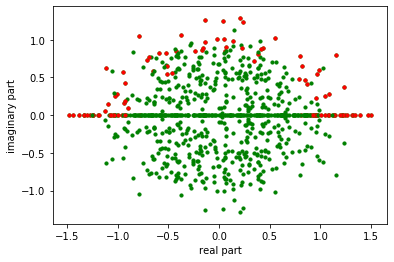

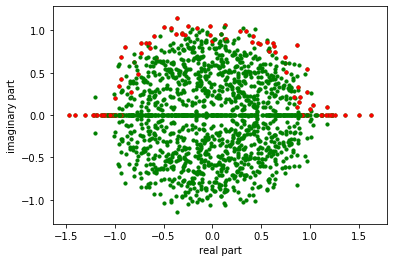

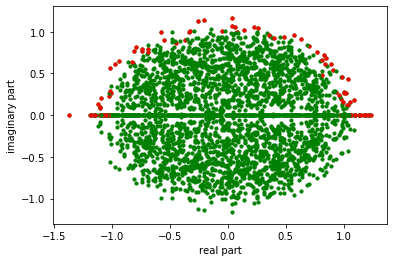

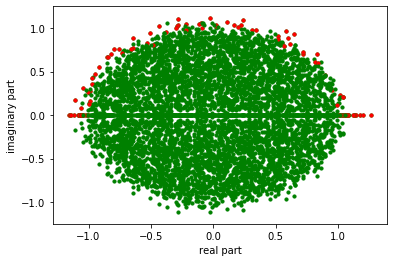

In [14]:
import numpy as np
from matplotlib import pyplot as plt
norm_list = []
condition_numbers = []
for m in (8, 16, 32, 64):
    norm = 0
    condition_number = []
    for i in range(100):
        A = np.random.normal(0, pow(m, -1/2), (m, m))
        eigenvalues = np.linalg.eigvals(A)
        for eigenvalue in eigenvalues:
           plt.scatter(np.real(eigenvalue), np.imag(eigenvalue), c = 'g', s = 10)
        spectral_radius = max(eigenvalues, key = abs)
        norm += np.linalg.norm(A, ord = 2)
        plt.scatter(np.real(spectral_radius), np.imag(spectral_radius), c = 'r', s = 10)
        condition_number.append(np.linalg.norm(A, ord = -2))
    norm /= 100
    norm_list.append(norm)
    condition_numbers.append(condition_number)
    plt.xlabel('real part')
    plt.ylabel('imaginary part')
    plt.show()


이 결과를 통해, A의 대부분의 eigenvalue들은 0을 중심으로 반지름이 1인 원 안에 위치하며, m이 커져도 이 경향성은 유지됨을 알 수 있다. 이로 인해 spectral radius는 1에 가까운 값을 가지며, m이 커질수록 더 그러한 경향성을 가진다.

### 4.3.(b) (4.3.(a) 코드와 같이 볼 것)

In [15]:
for i in range(4):
    print("Average 2_norm of %d*%d matrix : %f" %(pow(2, 3 + i), pow(2, 3 + i), norm_list[i]))

Average 2_norm of 8*8 matrix : 1.770570
Average 2_norm of 16*16 matrix : 1.851318
Average 2_norm of 32*32 matrix : 1.916968
Average 2_norm of 64*64 matrix : 1.950376


m이 커질 때 A의 2-norm은 증가하면서 2로 수렴함을 확인할 수 있다. 따라서 A의 2-norm은 1로 수렴하는 A의 spectral radius와 다른 값으로 수렴함을 알 수 있다. 

### 4.3.(c) (4.3.(a) 코드와 같이 볼 것)

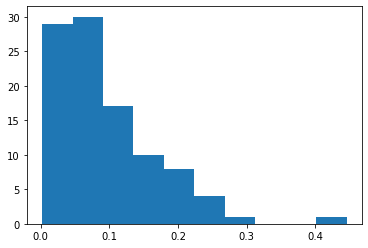

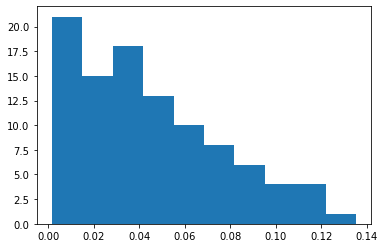

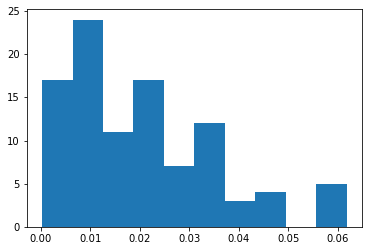

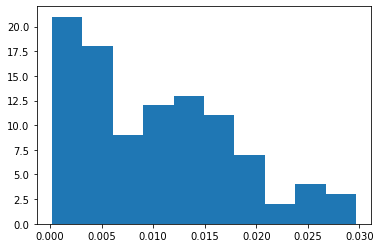

In [16]:
for i in range(4):
    plt.hist(condition_numbers[i])
    plt.show()

이 결과를 통해, condition number의 분포는 양의 왜도를 가진 분포이며, m이 커질수록 condition number가 작아짐을 x축 값을 통해 확인할 수 있다.

### 4.3.(d)

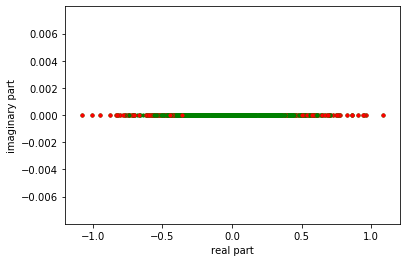

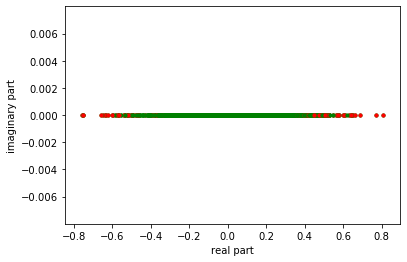

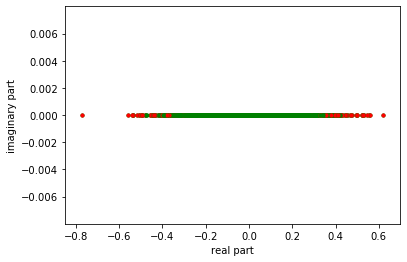

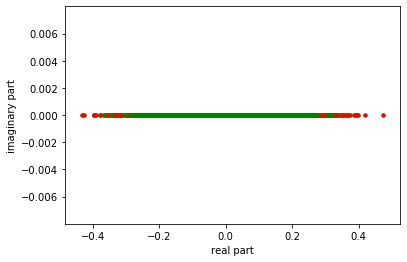

Average 2_norm of 8*8 matrix : 1.426699
Average 2_norm of 16*16 matrix : 1.513406
Average 2_norm of 32*32 matrix : 1.560060
Average 2_norm of 64*64 matrix : 1.593266


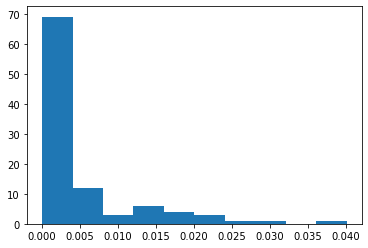

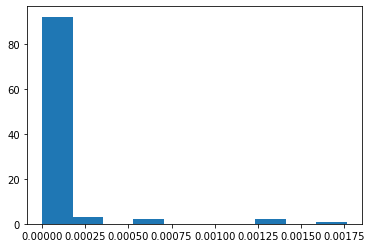

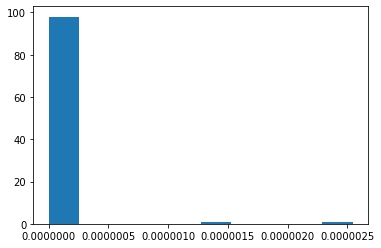

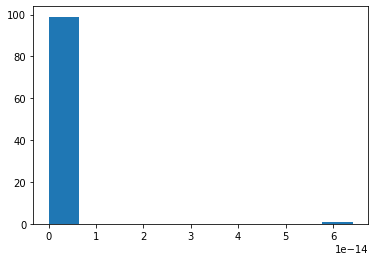

In [24]:
norm_list = []
condition_numbers = []
for m in (8, 16, 32, 64):
    norm = 0
    condition_number = []
    for i in range(100):
        A = np.triu(np.random.normal(0, pow(m, -1/2), (m, m)))
        eigenvalues = np.linalg.eigvals(A)
        for eigenvalue in eigenvalues:
           plt.scatter(np.real(eigenvalue), np.imag(eigenvalue), c = 'g', s = 10)
        spectral_radius = max(eigenvalues, key = abs)
        norm += float(np.linalg.norm(A, ord = 2))
        plt.scatter(np.real(spectral_radius), np.imag(spectral_radius), c = 'r', s = 10)
        condition_number.append(np.linalg.norm(A, ord = -2))
    norm /= 100
    norm_list.append(norm)
    condition_numbers.append(condition_number)
    plt.xlabel('real part')
    plt.ylabel('imaginary part')
    plt.show()
for i in range(4):
    print("Average 2_norm of %d*%d matrix : %f" %(pow(2, 3 + i), pow(2, 3 + i), norm_list[i]))
for i in range(4):
    plt.hist(condition_numbers[i])
    plt.show()


이 코드는 4.3.(a) ~ (c)의 코드에서 A를 upper triangular matrix로 만드는 코드만 추가한 것이다. 결과를 보면, A가 삼각행렬일 때 eigenvalue는 모두 실수이고, 그 크기 분포는 A가 삼각행렬이 아닐 때와 같음을 알 수 있다. 행렬의 2-norm은 A가 삼각행렬이 아닐 때보다 작게 측정되지만, 삼각행렬이 아닐 때와 같이 m에 대한 증가함수이다.(2로 수렴하는지는 이 데이터만으로는 알 수 없다.) condition number의 경우, 일반적인 condition number보다 극단적으로 큰 outlier가 종종 나타남을 확인할 수 있고, condition number의 크기는 A가 삼각행렬이 아닐 때보다 훨씬 더 작으며, m이 커질 때 굉장히 큰 폭으로 크기가 감소함을 알 수 있다. 

## 4.6.

In [26]:
import numpy as np
import math

m, n = 50, 12
t = np.linspace(0, 1, m)
A = np.fliplr(np.vander(t, n))
b = np.array([math.cos(4*i) for i in t])

### 4.6.(a)~(f)에 필요한 3.2.의 코드

In [ ]:
def clgs(A):
    m, n = np.shape(A)
    V = np.copy(A)
    Q = np.eye(m, n)
    R = np.zeros((n, n))
    for j in range(n):
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]
    return Q, R

def mgs(A):
    m, n = np.shape(A)
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(n - 1):
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] = Q[:, i] / R[i, i]
        R[i, i + 1:] = np.matmul(Q[:, i], Q[:, i + 1:])
        Q[:, i + 1:] = Q[:, i + 1:] - np.matmul(Q[:, i:i + 1], R[i:i + 1, i + 1:])
    R[n - 1, n - 1] = np.linalg.norm(Q[:, n - 1])
    Q[:, n - 1] = Q[:, n - 1] / R[n - 1, n - 1]
    return Q, R

def qrhouse(A):
    m, n = np.shape(A)
    R = np.copy(A)
    V = np.zeros((m, n))
    for k in range(n):
        x = R[k:, k]
        v = x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1)[:, 0]
        V[k:, k] = v
        R[k:, k:] = R[k:, k:] - 2 * np.matmul(np.outer(v, v), R[k:, k:]) / np.dot(v, v)
    R = np.triu(R[:n, :])
    return V, R

def formQ(V):
    m, n = np.shape(V)
    Q = np.eye(m, n)
    for j in range(n - 1, -1, -1):
        v = V[:, j]
        Q = Q - 2 * np.matmul(np.outer(v, v), Q) / np.dot(v, v)
    return Q

### 4.6.(a)

In [34]:
x = np.linalg.solve(A.T @ A, np.matmul(A.T, b))
print(x)

[ 1.00000003e+00 -7.99094873e-06 -7.99969704e+00 -4.50638100e-03
  1.07014920e+01 -1.58521428e-01 -5.23676444e+00 -8.26826113e-01
  2.58165417e+00 -6.47738473e-01 -1.01555158e-01  3.88271942e-02]


### 4.6.(b)

In [35]:
Q, R = mgs(np.copy(A))
x = np.linalg.solve(R, np.matmul(Q.T, b))
print(x)

[ 1.00000000e+00 -4.58240104e-07 -7.99998009e+00 -3.33437814e-04
  1.06695290e+01 -1.42085086e-02 -5.64611093e+00 -7.68632224e-02
  1.69520470e+00  5.00761554e-03 -3.73871301e-01  8.79830113e-02]


### 4.6.(c)

In [39]:
V, R = qrhouse(np.copy(A))
Q = formQ(V)
x = np.linalg.solve(R, np.matmul(Q.T, b))
print(x)

[ 1.00000000e+00 -4.22743306e-07 -7.99998124e+00 -3.18763327e-04
  1.06694308e+01 -1.38202906e-02 -5.64707562e+00 -7.53160358e-02
  1.69360698e+00  6.03209969e-03 -3.74241700e-01  8.80405754e-02]


### 4.6.(d)

In [37]:
Q, R = np.linalg.qr(np.copy(A))
x = np.linalg.solve(R, np.matmul(Q.T, b))
print(x)

[ 1.00000000e+00 -4.22743382e-07 -7.99998124e+00 -3.18763322e-04
  1.06694308e+01 -1.38202901e-02 -5.64707562e+00 -7.53160326e-02
  1.69360697e+00  6.03210277e-03 -3.74241701e-01  8.80405757e-02]


### 4.6.(f)

In [38]:
U, S, Vt = np.linalg.svd(np.copy(A))
S = np.diag(S)
x = np.matmul(Vt.T @ np.linalg.inv(S[:n, :]) @ U[:, :n].T, b)
print(x)

[ 1.00000000e+00 -4.22743378e-07 -7.99998124e+00 -3.18763307e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160322e-02
  1.69360697e+00  6.03210216e-03 -3.74241701e-01  8.80405757e-02]


### 4.6.(g)


  ###### normal equation
  <span style="color:red">1.00000003e+00 -7.99094873e-06 -7.99969704e+00 -4.50638100e-03</span>

    
  <span style="color:red">1.07014920e+01 -1.58521428e-01 -5.23676444e+00 -8.26826113e-01</span>

    
  <span style="color:red">2.58165417e+00 -6.47738473e-01 -1.01555158e-01  3.88271942e-02</span>
  
  ###### mgs
  <span style="color:purple">1.00000000e+00 -4.58240104e-07 -7.99998009e+00 -3.33437814e-04</span>
  
  <span style="color:purple">1.06695290e+01 -1.42085086e-02 -5.64611093e+00 -7.68632224e-02</span>
  
  <span style="color:purple">1.69520470e+00  5.00761554e-03 -3.73871301e-01  8.79830113e-02</span>
  ###### qrhouse
  1.00000000e+00 -4.22743306e-07 -7.99998124e+00 -3.18763327e-04
  
  1.06694308e+01 -1.38202906e-02 -5.64707562e+00 -7.53160358e-02
  
  1.69360698e+00  6.03209969e-03 -3.74241700e-01  8.80405754e-02
  
  ###### qr
  1.00000000e+00 -4.22743382e-07 -7.99998124e+00 -3.18763322e-04
  
  1.06694308e+01 -1.38202901e-02 -5.64707562e+00 -7.53160326e-02
  
  1.69360697e+00  6.03210277e-03 -3.74241701e-01  8.80405757e-02
  
  ###### svd
  1.00000000e+00 -4.22743378e-07 -7.99998124e+00 -3.18763307e-04
  
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160322e-02
  
  1.69360697e+00  6.03210216e-03 -3.74241701e-01  8.80405757e-02

3.2에서 만든 qrhouse 함수를 통해 얻은 결과와 파이썬 내장 함수인 qr, svd 함수를 사용하여 얻은 결과는 거의 완벽하게 일치함을 알 수 있다. 그에 반해, normal equation을 풀어 얻은 x와 3.2에서 만든 mgs 함수를 이용하여 얻은 x는 이 값과 일치하지 않는다. mgs를 풀어 얻은 x는 실제 x와 크게 차이나지 않는 수준의 오차를 가지고, normal equation을 풀어 얻은 x는 큰 오차를 가짐을 확인할 수 있다. 